# Part 1: Introduction To Cellular Automata

In the first part of this tutorial, we introduce the concept of a cellular automaton (CA), one of the first frameworks formulated to model complex systems, and explore how a seemingly simple schema can powerfully portray behavior in nonlinear dynamic systems. We then introduce our case study, Game of Life, which we will use throughout the extent of this tutorial to reinforce the concepts discussed.

## 1.1 What is CA?

Originally devised by mathematicians John von Neumann and Stanislaw Ulam in the 1940s, a cellular automaton consists of a regular *n x n* grid of cells, where each cell represents an individual *"automaton."* In computer science and mathematics, the term *automaton* refers to a machine that consists primarily of an internal state that changes based on its inputs.

CA are temporally and spatially discrete, which implies that

despite its simplicity, the model achieves impressive diversity of behavior
Though the schema itself is quite basic, complex macroscopic behavior can evolve from the individual interactions between cells. However, Before we , we need to build up a foundation of the concepts behind the 

1.1.a States and Transitions
state set is finite
transition functions

1.1.b Neighborhoods
moore and von neumann

1.1.c Boundaries

1.1.d Classes of Cellular Automata
In the 1980s, computer scientist Stephen Wolfram published a book titled 

These definitions relate to how a cellular automaton evolves over time.

1. Class 1: Initial patterns evolve into stable, homogeneous states regardless of randomness in the initial state
2. Class 2: Initial patterns evolve into either stable or oscillating states.
3. Class 3:
4. Class 4:

The interested reader is invited to explore 



conclusion and segue to game of life
The set of concepts and rules defined above are not exhaustive. As it is with any form of modeling, the specifics rely heavy on the description and configuration of the problem itself.
After this high level look at CA, we now have the basic concepts and definitions to be able to dive deeper 


## 1.2 A Case Study: Game of Life

To accompany our exploration of this framework, we introduce 

Proposed by British mathematician John Conway in 1970, Game of Life is one of the most well-known examples of a cellular automaton

In this section, we explore a basic Python implementation of Game of Life ... and to serve as a foundation for the rest of this tutorial.

First, let's import our libraries. We utilize numpy for it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
from itertools import product

Every cell consists of one of two self-explanatory states:
1. Alive
2. Dead (essentially an empty cell)
    
Let's associate these states with the integers 1 and 0. Although we could use booleans, using integers opens the door to possibly including more states when we expand the model in later tutorials.

In [2]:
# States:
ALIVE = 1
DEAD = 0

With our states defined, we now need a way of generating 

mention initial conditions, how we represent the world, 

In [3]:
def init_world(n = 16, cluster_n = 4, clusters = 3, threshold = 0.25):
    world = np.zeros((n, n), dtype=int)

    for i in range(0, clusters):
        x = random.randint(0, n - cluster_n)
        y = random.randint(0, n - cluster_n)
        for world_x in range(x, x + cluster_n):
            for world_y in range(y, y + cluster_n):
                if random.uniform(0, 1) >= (1 - threshold):
                    world[world_x, world_y] = ALIVE

    return world

To draw our world, we utilize matplotlib

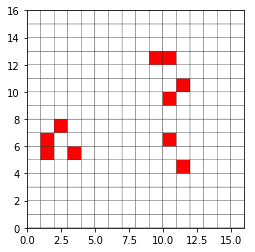

In [4]:
def plot_world(world):
    cmap = colors.ListedColormap(['white', 'red'])
    plt.pcolor(world, cmap=cmap, edgecolor="black")
    plt.axis('square')
    plt.show()
    
world = init_world() # initialize world with default conditions
plot_world(world)

Each time step is viewed as a *generation*. Transitions between generations follow the von Neumann neighborhood paradigm and are as follows:
1. Any living cell with fewer than 2 neighbors dies **(underpopulation)**
2. Any living cell with 2 or 3 neighbors lives on to the next generation
3. Any living cell with more than 3 neighbors dies **(overpopulation)**
4. Any dead cell with exactly 3 neighbors becomes a living cell **(reproduction)**

In [ ]:
def update_cell(world, x, y):
    num_alive = 0
    current_state = world[x,y]

    #count neighbors
    x_range = range(max(x - 1, 0), min(x + 1, world.shape[0] - 1) + 1)
    y_range = range(max(y - 1, 0), min(y + 1, world.shape[1] - 1) + 1)

    for cell_x, cell_y in product(x_range, y_range):
        if (not (cell_x, cell_y) == (x, y) and world[cell_x, cell_y] == ALIVE):
            num_alive += 1

    if (current_state == DEAD and not num_alive == 3):
        return DEAD
    elif (current_state == ALIVE and (num_alive < 2 or num_alive > 3)):
        return DEAD
    else:
        return ALIVE

not done, need timestep

In [ ]:
def timestep(world):
    rows = world.shape[0]
    cols = world.shape[1]

    new_state = np.zeros((rows, cols), dtype=int)
    for x in range(0, rows):
        for y in range(0, cols):
            new_state[x,y] = update_cell(world, x, y)

    return new_state

note optimization/brute force, O(n^2)


Boundaries






## 1.3 Analysis of Game of Life?

density plots, phase space?, transition diagrams?, cobweb plots?